In [1]:
import numpy as np
import tensorflow as tf
import pickle
from matplotlib import pyplot as plt

import shutil
import os


from model.models_cstm import get_embedding_model
from model.train_model import train_siamese_model


## Get Qiita Data

In [2]:
!wget https://www.dropbox.com/s/mv546rx259tgwaz/qiita_numpy.pkl

--2021-12-15 23:17:45--  https://www.dropbox.com/s/mv546rx259tgwaz/qiita_numpy.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/mv546rx259tgwaz/qiita_numpy.pkl [following]
--2021-12-15 23:17:46--  https://www.dropbox.com/s/raw/mv546rx259tgwaz/qiita_numpy.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6cf73d0712ecf8837e08861479.dl.dropboxusercontent.com/cd/0/inline/Bb4BC6XWxXeoCRk4M9OX7_rA06rMymQbLeAIDKDmWJpPxdPSet-0xQzwDbJ_5Oe27TJLzHGeW1jR5yiLLN61_jYAQrnNjgZRlhEHmGW_YDwPPcJMH3hecdsvjDgFt6m7tDYevNWFFMDhpig6X18FeLbU/file# [following]
--2021-12-15 23:17:46--  https://uc6cf73d0712ecf8837e08861479.dl.dropboxusercontent.com/cd/0/inline/Bb4BC6XWxXeoCRk4M9OX7_rA06rMymQbLeAIDKDmWJpPxdPSet-0xQzwDbJ_5Oe27TJLzHGeW1jR5yiLLN61_jYAQrnNjgZRlhEHmGW_YDwPP

In [3]:
cwd = os.getcwd()
shutil.move(f"{cwd}/qiita_numpy.pkl", f"{cwd}/data/qiita/qiita_numpy.pkl")

'/Users/rohithravin/Github/ECBM4040-NuroSEED-Proj/data/qiita/qiita_numpy.pkl'

## Load Qiita Dataset

In [4]:
# Load QIITA dataset.
((X_train, X_test, X_val), (y_train, y_test, y_val)) = pickle.load(open(f"{cwd}/data/qiita/qiita_numpy.pkl", "rb"))

## Train Siamese Model

In [5]:
# Train and Test Siamese Model
embedding = get_embedding_model()
data = ((X_train[:1000], X_test, X_val[:1000]), (y_train[:1000,:1000], y_test, y_val[:1000,:1000]))

model, history = train_siamese_model(data, embedding, 'euclidean', batch_size=256, epochs=5)

2021-12-15 23:17:52.366690: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-15 23:17:52.366945: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
  12/1951 [..............................] - ETA: 19s - loss: 5313.4985

2021-12-15 23:17:53.012213: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


1951/1951 [==============================] - 20s 10ms/step - loss: 5120.0703 - val_loss: 4552.0190
Epoch 2/5
1951/1951 [==============================] - 20s 10ms/step - loss: 3756.1121 - val_loss: 2606.6050
Epoch 3/5
1951/1951 [==============================] - 20s 10ms/step - loss: 1975.8113 - val_loss: 1492.3372
Epoch 4/5
1951/1951 [==============================] - 20s 10ms/step - loss: 1362.4674 - val_loss: 1153.7324
Epoch 5/5
4391/4391 [==============================] - 17s 4ms/step - loss: 1007.5835
Score: 1007.58349609375


## Visualize Loss 

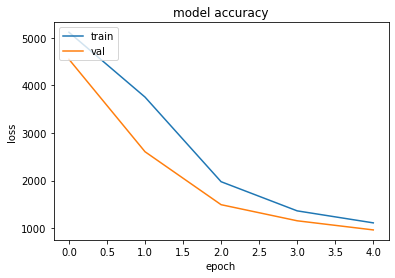

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()